<a href="https://colab.research.google.com/github/HenryZumaeta/MDS_UNI/blob/Zeta/CICLO02/MLSFUN/PROPENSION_USO_TC_ARBOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODELO DE USO DE TC**

Una entidad financiera busca incrememtar la usabilidad de la TC entre sus clientes. Actualmente el negocio de la tarjeta de crédito de esta entidad tienen problemas internos y externos.
A nivel externo:
Existe falta de competitividad con su competidores en el negocio de TC.
Baja participación de mercado
Poca variación en saldo.
A nivel inteerno:
Esta generando perdidas e la organización.

**CARGAR LIBRERIAS**


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
import multiprocessing

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
!pip install sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


**CARGAR BASE DE DATOS**

In [ ]:
!pip install pyreadstat
import pyreadstat
Data = pd.read_spss("BASE PROPENSION AL USO DE TC.sav")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 19.4 MB/s eta 0:00:00


In [ ]:
Data.head()

,CodCli,Edad,Gener,EstCiv,Sexo,NZONA,Region,Ingreso,Perfil,Lin_Ent001,...,TC_Ent050,TC_Ent058,TC_Ent097,TC_Ent100,TC_Ent108,TC_Ent110,TC_Ent113,TC_Ent349,MaxSal,UsoTC
0,11146.0,78.0,SILENCIOSA : [69 - MÁS>,Casado,Masculino,LIMA MODERNA,LIMA,3098.52,CONSERVADOR,32700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12238.17,12238.17,NO
1,11165.0,49.0,X : [36 - 49],Casado,Femenino,LIMA MODERNA,LIMA,1088.96,INDIFERENTE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193.81,NaN,193.81,NO
2,11210.0,52.0,BABY BOOMERS : [50 - 68],Soltero,Femenino,LIMA NORTE,LIMA,1863.20,CONSERVADOR,4800.0,...,2373.68,NaN,NaN,NaN,NaN,15687.83,NaN,NaN,15687.83,NO
3,11272.0,67.0,BABY BOOMERS : [50 - 68],Casado,Masculino,LIMA MODERNA,LIMA,2715.96,CONSERVADOR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12386.96,12386.96,NO
4,11316.0,69.0,SILENCIOSA : [69 - MÁS>,Casado,Masculino,CALLAO,CALLAO,1069.87,CONSERVADOR,NaN,...,NaN,NaN,NaN,NaN,NaN,6.99,NaN,NaN,6.99,NO


**FASE 2 y 3: COMPRENSIÓN Y PREPARACIÓN DE LOS DATOS**

**ANALISIS DE DATOS PERDIDOS**

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212671 entries, 0 to 212670
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   CodCli      212671 non-null  float64 
 1   Edad        212671 non-null  float64 
 2   Gener       212671 non-null  category
 3   EstCiv      212671 non-null  category
 4   Sexo        212671 non-null  category
 5   NZONA       212671 non-null  category
 6   Region      212671 non-null  category
 7   Ingreso     212671 non-null  float64 
 8   Perfil      212671 non-null  category
 9   Lin_Ent001  59799 non-null   float64 
 10  Lin_Ent002  78166 non-null   float64 
 11  Lin_Ent004  20923 non-null   float64 
 12  Lin_Ent006  31281 non-null   float64 
 13  Lin_Ent022  89 non-null      float64 
 14  Lin_Ent039  4160 non-null    float64 
 15  Lin_Ent049  57250 non-null   float64 
 16  Lin_Ent050  70079 non-null   float64 
 17  Lin_Ent058  126242 non-null  float64 
 18  Lin_Ent097  1663 non-nul

In [ ]:
 Data.isnull().sum()

CodCli             0
Edad               0
Gener              0
EstCiv             0
Sexo               0
NZONA              0
Region             0
Ingreso            0
Perfil             0
Lin_Ent001    152872
Lin_Ent002    134505
Lin_Ent004    191748
Lin_Ent006    181390
Lin_Ent022    212582
Lin_Ent039    208511
Lin_Ent049    155421
Lin_Ent050    142592
Lin_Ent058     86429
Lin_Ent097    211008
Lin_Ent100    179058
Lin_Ent108    206021
Lin_Ent110    136291
Lin_Ent113    162459
Lin_Ent349    204598
MaxLin             0
TC_Ent001     169867
TC_Ent002     152049
TC_Ent004     200353
TC_Ent006     193995
TC_Ent022     212608
TC_Ent039     209981
TC_Ent049     184530
TC_Ent050     172550
TC_Ent058     144358
TC_Ent097     211580
TC_Ent100     189400
TC_Ent108     206021
TC_Ent110     143188
TC_Ent113     177617
TC_Ent349     207109
MaxSal             0
UsoTC              0
dtype: int64

**DICOTOMIZACION DE LOS DATOS PERDIDOS**


In [ ]:
Data["D_Lin_Ent001"] = np.where(Data["Lin_Ent001"].isnull() == True,0,1)
Data["D_Lin_Ent002"] = np.where(Data["Lin_Ent002"].isnull() == True,0,1)
Data["D_Lin_Ent004"] = np.where(Data["Lin_Ent004"].isnull() == True,0,1)
Data["D_Lin_Ent006"] = np.where(Data["Lin_Ent006"].isnull() == True,0,1)
Data["D_Lin_Ent022"] = np.where(Data["Lin_Ent022"].isnull() == True,0,1)
Data["D_Lin_Ent039"] = np.where(Data["Lin_Ent039"].isnull() == True,0,1)
Data["D_Lin_Ent049"] = np.where(Data["Lin_Ent049"].isnull() == True,0,1)
Data["D_Lin_Ent050"] = np.where(Data["Lin_Ent050"].isnull() == True,0,1)
Data["D_Lin_Ent058"] = np.where(Data["Lin_Ent058"].isnull() == True,0,1)
Data["D_Lin_Ent097"] = np.where(Data["Lin_Ent097"].isnull() == True,0,1)
Data["D_Lin_Ent100"] = np.where(Data["Lin_Ent100"].isnull() == True,0,1)
Data["D_Lin_Ent108"] = np.where(Data["Lin_Ent108"].isnull() == True,0,1)
Data["D_Lin_Ent110"] = np.where(Data["Lin_Ent110"].isnull() == True,0,1)
Data["D_Lin_Ent113"] = np.where(Data["Lin_Ent113"].isnull() == True,0,1)
Data["D_Lin_Ent349"] = np.where(Data["Lin_Ent349"].isnull() == True,0,1)
Data["D_TC_Ent001"] = np.where(Data["TC_Ent001"].isnull() == True,0,1)
Data["D_TC_Ent002"] = np.where(Data["TC_Ent002"].isnull() == True,0,1)
Data["D_TC_Ent004"] = np.where(Data["TC_Ent004"].isnull() == True,0,1)
Data["D_TC_Ent006"] = np.where(Data["TC_Ent006"].isnull() == True,0,1)
Data["D_TC_Ent022"] = np.where(Data["TC_Ent022"].isnull() == True,0,1)
Data["D_TC_Ent039"] = np.where(Data["TC_Ent039"].isnull() == True,0,1)
Data["D_TC_Ent049"] = np.where(Data["TC_Ent049"].isnull() == True,0,1)
Data["D_TC_Ent050"] = np.where(Data["TC_Ent050"].isnull() == True,0,1)
Data["D_TC_Ent058"] = np.where(Data["TC_Ent058"].isnull() == True,0,1)
Data["D_TC_Ent097"] = np.where(Data["TC_Ent097"].isnull() == True,0,1)
Data["D_TC_Ent100"] = np.where(Data["TC_Ent100"].isnull() == True,0,1)
Data["D_TC_Ent108"] = np.where(Data["TC_Ent108"].isnull() == True,0,1)
Data["D_TC_Ent110"] = np.where(Data["TC_Ent110"].isnull() == True,0,1)
Data["D_TC_Ent113"] = np.where(Data["TC_Ent113"].isnull() == True,0,1)
Data["D_TC_Ent349"] = np.where(Data["TC_Ent349"].isnull() == True,0,1)

**TRATAMIENTO DE VARIABLES CONTINUAS**

0.00      651.84
0.10      834.15
0.20      967.78
0.30     1064.89
0.40     1149.55
0.50     1236.70
0.60     1332.98
0.70     1452.50
0.80     1623.20
0.90     2087.97
0.97     3319.68
0.98     3812.25
0.99     4778.18
1.00    13400.00
Name: Ingreso, dtype: float64

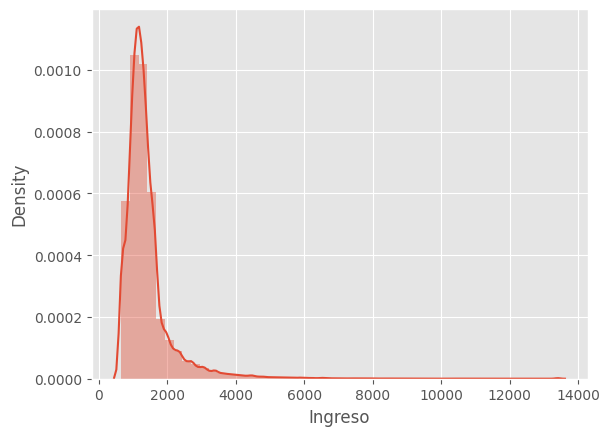

In [ ]:
sns.distplot(Data['Ingreso'])
Data['Ingreso'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

**ANALISIS DE DE LA VARIABLE MAXLIN**

0.00         0.010
0.10      1500.000
0.20      1800.000
0.30      2400.000
0.40      3500.000
0.50      4800.000
0.60      6280.000
0.70      8800.000
0.80     12839.800
0.90     22583.920
0.97     48000.000
0.98     57032.600
0.99     71439.761
1.00    293356.000
Name: MaxLin, dtype: float64

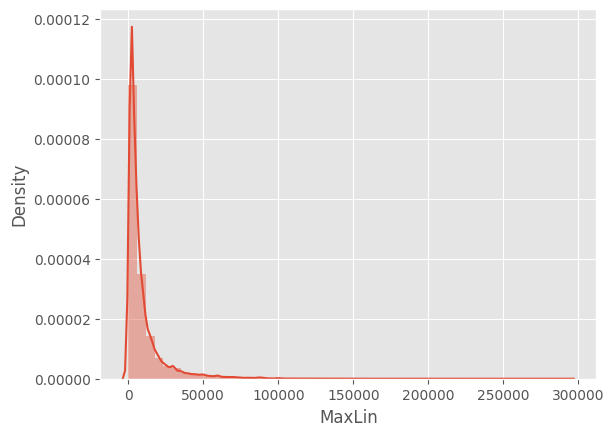

In [ ]:
sns.distplot(Data['MaxLin'])
Data['MaxLin'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

**ANALISIS DE LA VARIABLE MAXIMO SALDO**

0.00         0.010
0.10       199.560
0.20       470.880
0.30       779.640
0.40      1128.840
0.50      1552.110
0.60      2122.100
0.70      3194.120
0.80      5038.030
0.90      9738.810
0.97     23331.526
0.98     29131.310
0.99     40485.415
1.00    212738.440
Name: MaxSal, dtype: float64

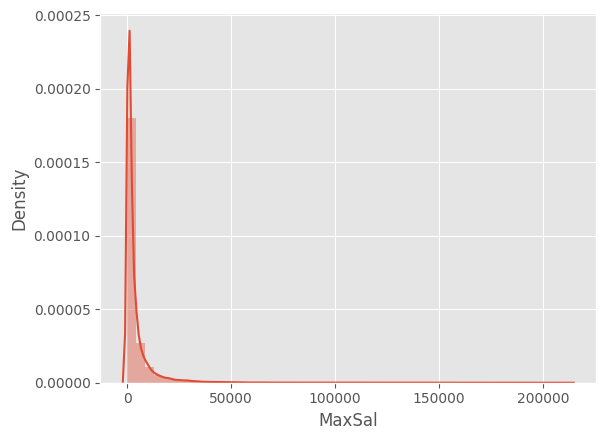

In [ ]:
sns.distplot(Data['MaxSal'])
Data['MaxSal'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .97, .98, .99, 1])

**TRANSFORMACIÓN DE VARIABLES CONTINUAS**

In [ ]:
Data["T_MaxLin"] = np.log(Data["MaxLin"])
Data['T_MaxSal'] = np.log(Data["MaxSal"])
Data['T_Ingreso'] = np.log(Data["Ingreso"])

**VERIFICACIÓN DE LA DISTRIBUCIÓN DE LA VARIABLE TRASNFORMADA**

<Axes: xlabel='T_MaxLin', ylabel='Density'>

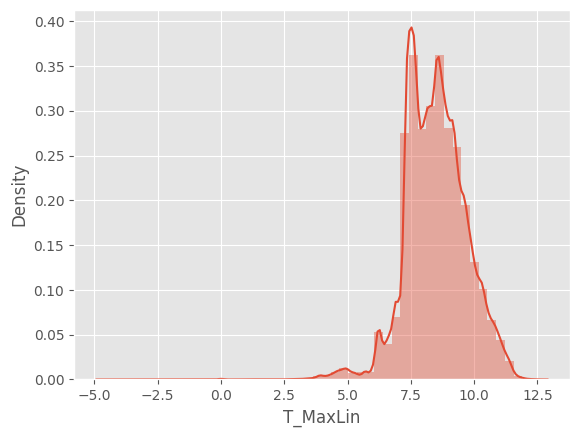

In [ ]:
sns.distplot(Data['T_MaxLin'])

<Axes: xlabel='T_MaxSal', ylabel='Density'>

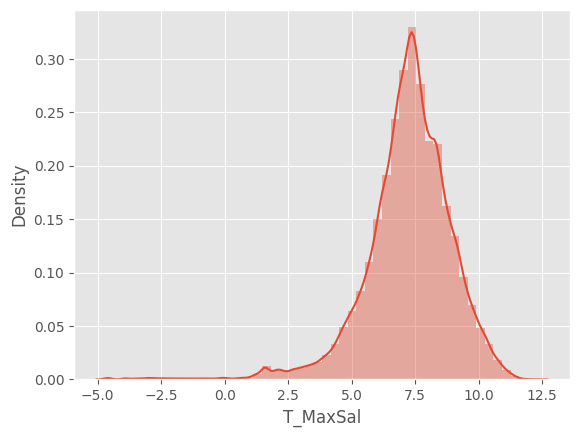

In [ ]:
sns.distplot(Data['T_MaxSal'])

<Axes: xlabel='T_Ingreso', ylabel='Density'>

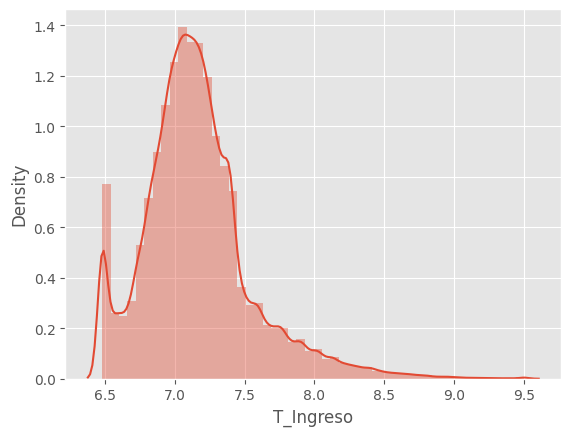

In [ ]:
sns.distplot(Data['T_Ingreso'])

<Axes: xlabel='T_MaxLin'>

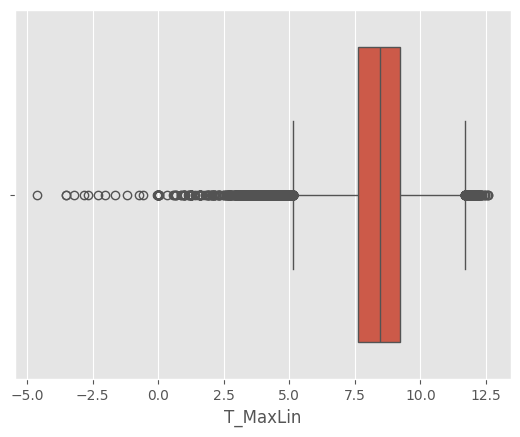

In [ ]:
sns.boxplot(x=Data['T_MaxLin'])

<Axes: xlabel='T_MaxSal'>

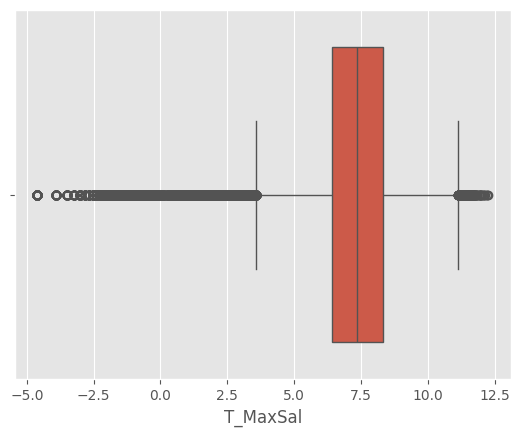

In [ ]:
sns.boxplot(x=Data['T_MaxSal'])

<Axes: xlabel='T_Ingreso'>

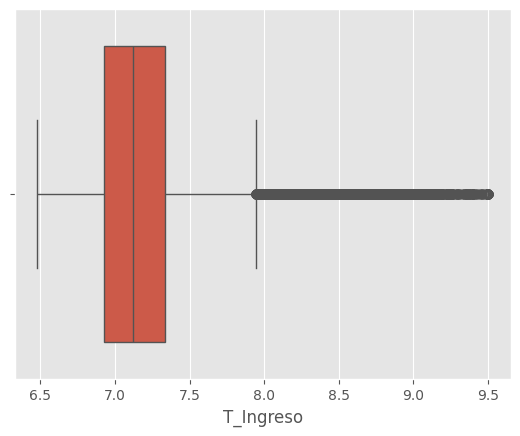

In [ ]:
sns.boxplot(x=Data['T_Ingreso'])

**ANALSIS DE LA VARIABLE EDAD**

<Axes: xlabel='Edad', ylabel='Density'>

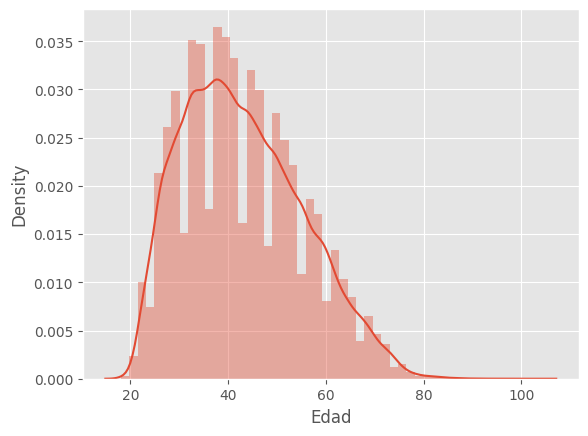

In [ ]:
sns.distplot(Data['Edad'])

In [ ]:
Data['Z_Edad'] = (Data['Edad'] - np.mean(Data['Edad']))/np.std(Data['Edad'])

<Axes: xlabel='Z_Edad', ylabel='Density'>

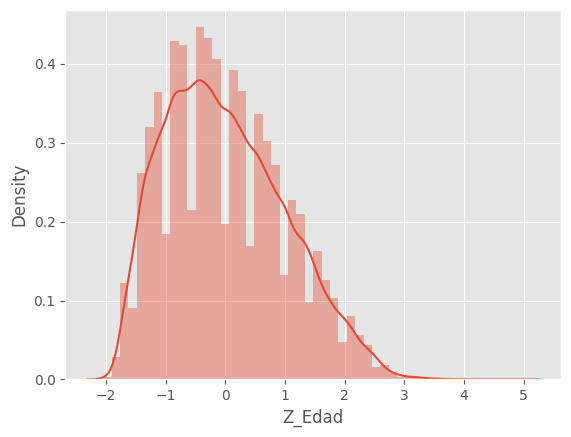

In [ ]:
sns.distplot(Data['Z_Edad'])

**TRATAMIENTO DE VARIABLES CATEGÓRICAS**

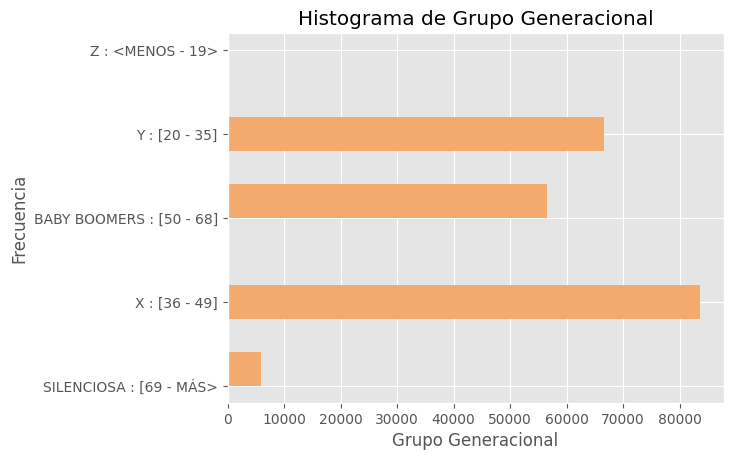

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(x=Data['Gener'], bins=10, color='#F2AB6D', rwidth=15,histtype='bar',orientation='horizontal')
plt.grid(True)
plt.title('Histograma de Grupo Generacional')
plt.xlabel('Grupo Generacional')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [ ]:
import scipy.stats as stats
stats.chi2_contingency(pd.crosstab(Data['Gener'],Data['UsoTC']))

Chi2ContingencyResult(statistic=883.2729878152442, pvalue=7.010595439910522e-190, dof=4, expected_freq=array([[2.28976390e+04, 3.36323610e+04],
       [2.37685027e+03, 3.49114973e+03],
       [3.38608001e+04, 4.97351999e+04],
       [2.69635598e+04, 3.96044402e+04],
       [4.41507634e+01, 6.48492366e+01]]))

In [ ]:
pd.crosstab(Data['Gener'],Data['UsoTC'],normalize='columns').round(3)*100

UsoTC,NO,SI
Gener,,
BABY BOOMERS : [50 - 68],28.8,25.1
SILENCIOSA : [69 - MÁS>,3.4,2.3
X : [36 - 49],38.7,39.8
Y : [20 - 35],29.1,32.8
Z : <MENOS - 19>,0.1,0.0


In [ ]:
Data["D_Gener_BB"] = np.where(Data["Gener"] == "BABY BOOMERS : [50 - 68]",1,0)
Data["D_Gener_X"] = np.where(Data["Gener"] == "X : [36 - 49]",1,0)
Data["D_Gener_Y"] = np.where(Data["Gener"] == "Y : [20 - 35]",1,0)

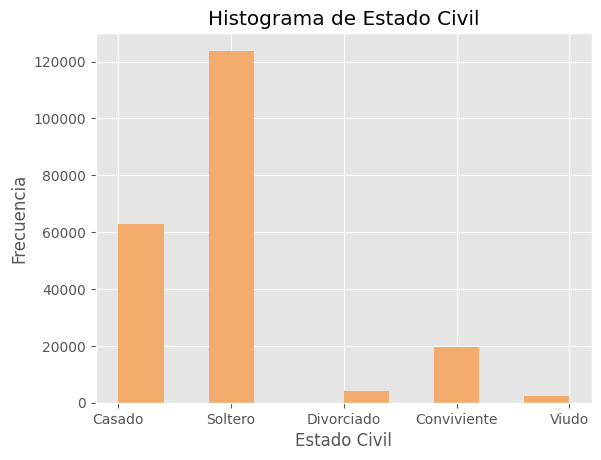

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(x=Data['EstCiv'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='vertical')
plt.grid(True)
plt.title('Histograma de Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [ ]:
stats.chi2_contingency(pd.crosstab(Data['EstCiv'],Data['UsoTC']))

Chi2ContingencyResult(statistic=611.6911331900504, pvalue=4.569597688169224e-131, dof=4, expected_freq=array([[25465.26920455, 37403.73079545],
       [ 7942.27677492, 11665.72322508],
       [ 1684.20985466,  2473.79014534],
       [50149.19141303, 73659.80858697],
       [  902.05275284,  1324.94724716]]))

In [ ]:
pd.crosstab(Data['EstCiv'],Data['UsoTC'],normalize='columns').round(3)*100

UsoTC,NO,SI
EstCiv,,
Casado,27.4,31.0
Conviviente,8.7,9.6
Divorciado,1.6,2.2
Soltero,61.3,56.1
Viudo,0.9,1.1


In [ ]:
Data["D_EstCiv_Cas"] = np.where(Data["EstCiv"] == "Casado",1,0)
Data["D_EstCiv_Sol"] = np.where(Data["EstCiv"] == "Soltero",1,0)
Data["D_EstCiv_Conv"] = np.where(Data["EstCiv"] == "Conviviente",1,0)

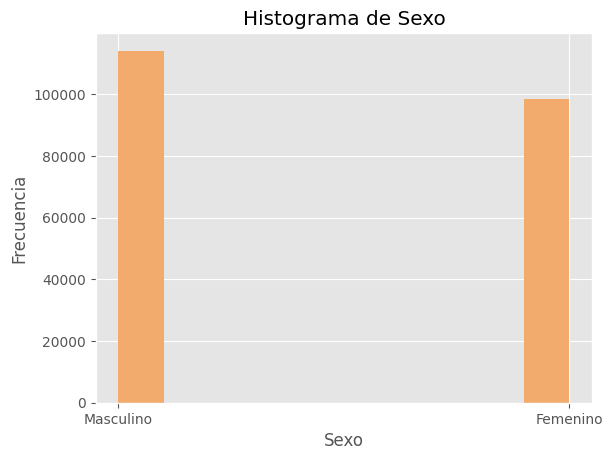

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(x=Data['Sexo'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='vertical')
plt.grid(True)
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [ ]:
stats.chi2_contingency(pd.crosstab(Data['Sexo'],Data['UsoTC']))

Chi2ContingencyResult(statistic=248.32578927122447, pvalue=6.017796932896763e-56, dof=1, expected_freq=array([[39904.59409605, 58612.40590395],
       [46238.40590395, 67915.59409605]]))

In [ ]:
pd.crosstab(Data['Sexo'],Data['UsoTC'],normalize='columns').round(3)*100

UsoTC,NO,SI
Sexo,,
Femenino,48.4,44.9
Masculino,51.6,55.1


In [ ]:
Data["D_Sexo_H"] = np.where(Data["Sexo"] == "Masculino",1,0)

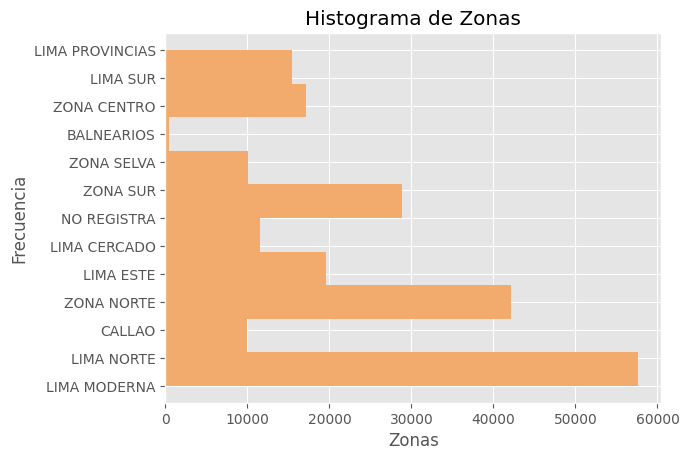

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(x=Data['NZONA'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='horizontal')
plt.grid(True)
plt.title('Histograma de Zonas')
plt.xlabel('Zonas')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [ ]:
stats.chi2_contingency(pd.crosstab(Data['NZONA'],Data['UsoTC']))

Chi2ContingencyResult(statistic=6232.68602198004, pvalue=0.0, dof=12, expected_freq=array([[  181.46368804,   266.53631196],
       [ 4026.63063135,  5914.36936865],
       [ 4677.95565451,  6871.04434549],
       [ 7910.68265067, 11619.31734933],
       [15214.19104156, 22346.80895844],
       [ 8116.44951122, 11921.55048878],
       [ 2676.18434577,  3930.81565423],
       [ 3584.71794462,  5265.28205538],
       [  117.46533378,   172.53466622],
       [ 6920.32837105, 10164.67162895],
       [17062.44731063, 25061.55268937],
       [ 4099.54014887,  6021.45985113],
       [11554.94336793, 16972.05663207]]))

In [ ]:
pd.crosstab(Data['NZONA'],Data['UsoTC'],normalize='columns').round(3)*100

UsoTC,NO,SI
NZONA,,
BALNEARIOS,0.2,0.2
CALLAO,4.0,5.1
LIMA CERCADO,5.4,5.5
LIMA ESTE,8.2,9.8
LIMA MODERNA,24.2,13.2
LIMA NORTE,8.2,10.2
LIMA PROVINCIAS,1.5,4.2
LIMA SUR,4.0,4.3
NO REGISTRA,0.2,0.1


In [ ]:
Data["D_NZONA_ZC"] = np.where(Data["NZONA"] == "ZONA CENTRO",1,0)
Data["D_NZONA_ZN"] = np.where(Data["NZONA"] == "ZONA NORTE",1,0)
Data["D_NZONA_ZS"] = np.where(Data["NZONA"] == "ZONA SUR",1,0)
Data["D_NZONA_LN"] = np.where(Data["NZONA"] == "LIMA NORTE",1,0)
Data["D_NZONA_LE"] = np.where(Data["NZONA"] == "LIMA ESTE",1,0)
Data["D_NZONA_LS"] = np.where(Data["NZONA"] == "LIMA SUR",1,0)

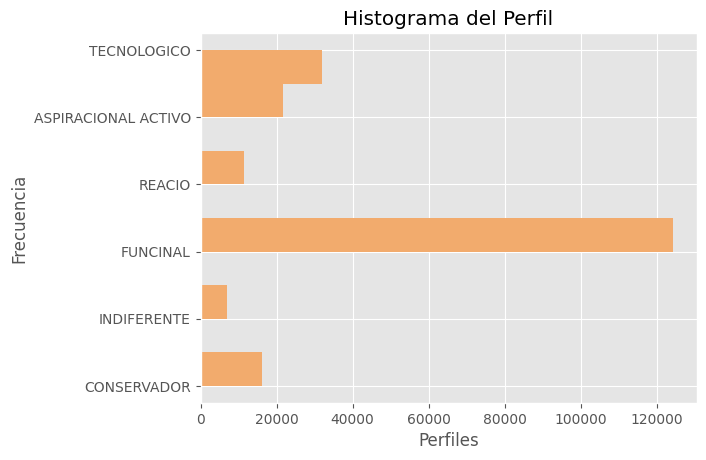

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.hist(x=Data['Perfil'], bins=10, color='#F2AB6D', rwidth=5,histtype='bar',orientation='horizontal')
plt.grid(True)
plt.title('Histograma del Perfil')
plt.xlabel('Perfiles')
plt.ylabel('Frecuencia')
plt.show()
plt.clf()

In [ ]:
stats.chi2_contingency(pd.crosstab(Data['Perfil'],Data['UsoTC']))

Chi2ContingencyResult(statistic=20201.878831396276, pvalue=0.0, dof=5, expected_freq=array([[ 8769.39474588, 12880.60525412],
       [ 6600.33659972,  9694.66340028],
       [50321.74393782, 73913.25606218],
       [ 2846.30655331,  4180.69344669],
       [ 4683.22134188,  6878.77865812],
       [12921.99682138, 18980.00317862]]))

In [ ]:
pd.crosstab(Data['Perfil'],Data['UsoTC'],normalize='columns').round(3)*100

UsoTC,NO,SI
Perfil,,
ASPIRACIONAL ACTIVO,3.1,15.0
CONSERVADOR,13.6,3.6
FUNCINAL,56.7,59.6
INDIFERENTE,7.1,0.7
REACIO,4.7,5.9
TECNOLOGICO,14.8,15.1


In [ ]:
Data["D_PERFIL_T"] = np.where(Data["Perfil"] == "TECNOLOGICO",1,0)
Data["D_PERFIL_AA"] = np.where(Data["Perfil"] == "ASPIRACIONAL ACTIVO",1,0)
Data["D_PERFIL_F"] = np.where(Data["Perfil"] == "FUNCINAL",1,0)

In [ ]:
Data["D_UsoTC"] = np.where(Data["UsoTC"] == "SI",1,0)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212671 entries, 0 to 212670
Data columns (total 93 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   CodCli         212671 non-null  float64 
 1   Edad           212671 non-null  float64 
 2   Gener          212671 non-null  category
 3   EstCiv         212671 non-null  category
 4   Sexo           212671 non-null  category
 5   NZONA          212671 non-null  category
 6   Region         212671 non-null  category
 7   Ingreso        212671 non-null  float64 
 8   Perfil         212671 non-null  category
 9   Lin_Ent001     59799 non-null   float64 
 10  Lin_Ent002     78166 non-null   float64 
 11  Lin_Ent004     20923 non-null   float64 
 12  Lin_Ent006     31281 non-null   float64 
 13  Lin_Ent022     89 non-null      float64 
 14  Lin_Ent039     4160 non-null    float64 
 15  Lin_Ent049     57250 non-null   float64 
 16  Lin_Ent050     70079 non-null   float64 
 17  Lin_Ent058

# Master Table

In [ ]:
DataModelo = pd.DataFrame(Data, columns=["T_Ingreso","T_MaxSal","T_MaxLin","D_Gener_BB","D_Gener_X","D_Gener_Y","D_Sexo_H",
                                          "D_NZONA_ZC","D_NZONA_ZN",
                                          "D_PERFIL_AA","D_PERFIL_F","D_PERFIL_T",
                                          "D_TC_Ent001","D_TC_Ent002","D_TC_Ent049","D_TC_Ent050","D_TC_Ent058",
                                          "D_TC_Ent100","D_TC_Ent110","D_TC_Ent349","D_UsoTC"])
DataModelo

,T_Ingreso,T_MaxSal,T_MaxLin,D_Gener_BB,D_Gener_X,D_Gener_Y,D_Sexo_H,D_NZONA_ZC,D_NZONA_ZN,D_PERFIL_AA,...,D_PERFIL_T,D_TC_Ent001,D_TC_Ent002,D_TC_Ent049,D_TC_Ent050,D_TC_Ent058,D_TC_Ent100,D_TC_Ent110,D_TC_Ent349,D_UsoTC
0,8.038680,9.412315,11.141523,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,6.992978,5.266878,7.207860,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.530051,9.660641,10.858999,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,7.906901,9.424400,9.604699,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.975292,1.944481,9.011889,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212666,6.910392,5.191790,7.863267,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
212667,6.977617,5.167240,6.214608,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
212668,7.181379,7.568813,9.457200,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
212669,7.069968,7.354855,7.972466,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
DataModelo.isnull().sum()

T_Ingreso      0
T_MaxSal       0
T_MaxLin       0
D_Gener_BB     0
D_Gener_X      0
D_Gener_Y      0
D_Sexo_H       0
D_NZONA_ZC     0
D_NZONA_ZN     0
D_PERFIL_AA    0
D_PERFIL_F     0
D_PERFIL_T     0
D_TC_Ent001    0
D_TC_Ent002    0
D_TC_Ent049    0
D_TC_Ent050    0
D_TC_Ent058    0
D_TC_Ent100    0
D_TC_Ent110    0
D_TC_Ent349    0
D_UsoTC        0
dtype: int64

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = DataModelo.drop(columns='D_UsoTC', axis=1)
y = DataModelo['D_UsoTC']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
Tabla_Uso = pd.DataFrame({"FRECUENCIA":Data["UsoTC"].value_counts(),"PORCENTAJE":Data["UsoTC"].value_counts(normalize = True)*100})
Tabla_Uso

,FRECUENCIA,PORCENTAJE
SI,126528,59.494712
NO,86143,40.505288


# Regresión Logistica

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.431215
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               170136
Model:                          Logit   Df Residuals:                   170115
Method:                           MLE   Df Model:                           20
Date:                Tue, 30 Jan 2024   Pseudo R-squ.:                  0.3613
Time:                        00:32:26   Log-Likelihood:                -73365.
converged:                       True   LL-Null:                   -1.1486e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.1174      0.183     60.862      0.000      10.759      11.475
T_Ingreso      -2.7921    

In [ ]:
# Predicciones con intervalo de confianza
# ==============================================================================
predicciones = modelo.predict(exog = X_train)

# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# Accuracy de test del modelo
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 78.1615140472552%


In [ ]:
predicciones

60523     0.514196
212231    0.384773
101653    0.888430
64587     0.302944
33100     0.267500
            ...   
123232    0.443168
19        0.486899
4846      0.260937
114282    0.993781
150831    0.417704
Length: 42535, dtype: float64

In [ ]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,13812,3378
1,5911,19434


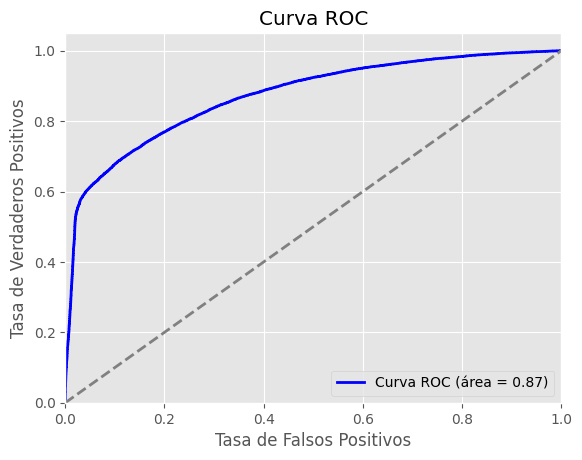

In [ ]:
# Calcular la curva ROC
!pip install scikit-learn
import sklearn.metrics
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, predicciones)
roc_auc = sklearn.metrics.auc(fpr, tpr)
roc_auc

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

**ARBOL DE CLASIFICACIÓN**

In [ ]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo2 = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 28


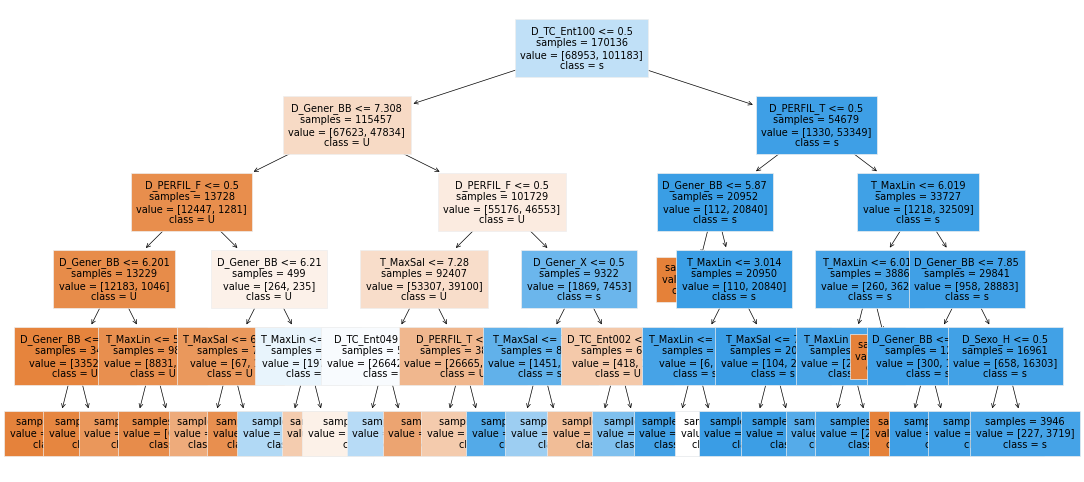

In [ ]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------

labels = ["T_Ingreso","T_MaxSal","T_MaxLin","D_Gener_BB","D_Gener_X","D_Gener_Y","D_Sexo_H",
          "D_NZONA_ZC","D_NZONA_ZN","D_PERFIL_AA","D_PERFIL_F","D_PERFIL_T",
          "D_TC_Ent001","D_TC_Ent002","D_TC_Ent049","D_TC_Ent050","D_TC_Ent058",
          "D_TC_Ent100","D_TC_Ent110","D_TC_Ent349"]

labels = tuple(labels)

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo2.get_depth()}")
print(f"Número de nodos terminales: {modelo2.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo2,
            feature_names = labels,
            class_names   = 'Uso_TC',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

**MATRIZ DE CONFUSIÓN DEL ARBOL DE CLASIFICACIÓN**

In [ ]:
# Error de test del modelo
#-------------------------------------------------------------------------------
predicciones = modelo2.predict(X = X_test,)

from sklearn.metrics import confusion_matrix

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[15010,  2180],
       [ 7828, 17517]])

In [ ]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 76.47114141295404 %


**PODA DEL ARBOL**

In [ ]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])},
             return_train_score=True, scoring='accuracy')

In [ ]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [ ]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 49
Número de nodos terminales: 29089


In [ ]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 74.74785470788761 %


**IMPORTANCIA DE PREDICTORES**

In [ ]:
labels = ["cte","T_Ingreso","T_MaxSal","T_MaxLin","D_Gener_BB","D_Gener_X","D_Gener_Y","D_Sexo_H",
          "D_NZONA_ZC","D_NZONA_ZN","D_PERFIL_AA","D_PERFIL_F","D_PERFIL_T",
          "D_TC_Ent001","D_TC_Ent002","D_TC_Ent049","D_TC_Ent050","D_TC_Ent058",
          "D_TC_Ent100","D_TC_Ent110","D_TC_Ent349"]

labels = tuple(labels)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores = pd.DataFrame(
                            {'predictor': labels,
                             'importancia': modelo_final.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
17,D_TC_Ent058,0.285158
1,T_Ingreso,0.180388
3,T_MaxLin,0.176891
2,T_MaxSal,0.165046
10,D_PERFIL_AA,0.031077
19,D_TC_Ent110,0.014183
7,D_Sexo_H,0.013240
4,D_Gener_BB,0.013002
11,D_PERFIL_F,0.012750
16,D_TC_Ent050,0.012499


In [ ]:
# Predicción de probabilidades
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict_proba(X = X_test)
# Clasificación empleando la clase de mayor probabilidad
# ------------------------------------------------------------------------------
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0'] > df_predicciones['1'], 0, 1)
df_predicciones.head(10)

,0,1,clasificacion_default_0.5
0,0.0,1.0,1
1,1.0,0.0,0
2,1.0,0.0,0
3,1.0,0.0,0
4,1.0,0.0,0
5,0.0,1.0,1
6,0.0,1.0,1
7,1.0,0.0,0
8,1.0,0.0,0
9,1.0,0.0,0


**RANDOM FOREST**

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:

    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )

    modelo.fit(X_train, y_train)

    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
23,0.812597,entropy,20.0,9,150
11,0.812497,gini,20.0,9,150
10,0.812368,gini,20.0,7,150
22,0.812238,entropy,20.0,7,150


In [ ]:
resultados.head(6)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
23,0.812597,entropy,20.0,9,150
11,0.812497,gini,20.0,9,150
10,0.812368,gini,20.0,7,150
22,0.812238,entropy,20.0,7,150
21,0.811057,entropy,20.0,5,150
9,0.810798,gini,20.0,5,150


In [ ]:
# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop paralelizado para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
def eval_oob_error(X, y, modelo, params, verbose=True):
    """
    Función para entrenar un modelo utilizando unos parámetros determinados
    y que devuelve el out-of-bag error
    """
    modelo.set_params(
        oob_score    = True,
        n_jobs       = -1,
        random_state = 123,
        ** params
    )

    modelo.fit(X, y)

    if verbose:
        print(f"Modelo: {params} \u2713")

    return{'params': params, 'oob_accuracy': modelo.oob_score_}

warnings.filterwarnings('ignore')
n_jobs     = multiprocessing.cpu_count() -1
pool       = multiprocessing.Pool(processes=n_jobs)
resultados = pool.starmap(
                eval_oob_error,
                [(X_train, y_train, RandomForestClassifier(), params) for params in param_grid]
             )
warnings.filterwarnings('default')

# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.drop(columns = 'params')
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados.head(6)

Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Modelo: {'criterio

,oob_accuracy,criterion,max_depth,max_features,n_estimators
23,0.812597,entropy,20.0,9,150
11,0.812497,gini,20.0,9,150
10,0.812368,gini,20.0,7,150
22,0.812238,entropy,20.0,7,150
21,0.811057,entropy,20.0,5,150
9,0.810798,gini,20.0,5,150


In [ ]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.8125969812385386 : 0.8125969812385386 accuracy


**Grid Search basado en validación cruzada**

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {
    'n_estimators': [150],
    'max_features': [5, 7, 9],
    'max_depth'   : [None, 3, 10, 20],
    'criterion'   : ['gini', 'entropy']
}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123),
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe